In [8]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from math import log
plt.style.use('bmh')

In [9]:
# ------------ Analytic Function

def expected_nodes(m,rho,first=True):
    if m==1:
        return 1
    else:
        p = (1-rho)**(m/2)
        if first != True:
            p /= 1 + p
        return 1+2*(1-p)*expected_nodes(m/2,rho,first=False)

def expected_internal_nodes(m,rho,first=True):
    if m==2:
        return 1
    else:
        p = (1-rho)**(m/2)
        if first != True:
            p /= 1 + p
        return 1+2*(1-p)*expected_internal_nodes(m/2,rho,first=False)



def closed_form_expectation_nodes(m, rho):
    p1 = lambda m, ml: (1-rho)**(ml/2) if ml == m else (1-rho)**(ml/2)/(1 + (1-rho)**(ml/2))
    p = lambda m, ml: 1 - p1(m, ml)
    L = int(log(m)/log(2))
    prod = lambda v: v[0] * prod(v[1:]) if len(v) > 1 else v[0]
    return 1 + sum([2**(l+1) * prod([p(m, m/(2**j)) for j in range(l+1)]) for l in range(L)])

p1 = lambda m, ml, rho: (1-rho)**(ml/2) if ml == m else (1-rho)**(ml/2)/(1 + (1-rho)**(ml/2))
p = lambda m, ml, rho: 1 - p1(m, ml, rho) if ml > 2 else 0

def closed_form_expectation_nodes(m, rho):
    L = int(log(m)/log(2))
    prod = lambda v: v[0] * prod(v[1:]) if len(v) > 1 else v[0]
    return 1 + sum([2**(l+1) * prod([p(m, m/(2**j), rho) for j in range(l+1)]) for l in range(L)])

def upper_bound(m, rho):
    L = int(log(m)/log(2))
    return 1 + p(m, m, rho) * sum([2**l for l in range(L)])

# ------------ Numerical functions

def sample_vector(m,rho):
    # sample a vector of m iid bernouly r.v. with p=rho
    return np.random.binomial(1,rho,size=(m,1))


def partition(x,cnt=0):
    # partition if there's at least 1 nnz in each half, and count them
    m = x.size
    if m == 1: 
        return cnt+1
    else:
        xl = x[0:int(m/2)]
        xr = x[int(m/2):]
        
        cnt_1 = 0
        cnt_2 = 0
        if np.sum(xl)>0:
            cnt_1 = partition(xl,cnt)
        if np.sum(xr)>0:
            cnt_2 = partition(xr,cnt)
        
    return 1+cnt_1+cnt_2

def partition_internal(x,cnt=0):
    # partition if there's at least 1 nnz in each half, and count them
    m = x.size
    if m == 2: 
        return cnt+1
    else:
        xl = x[0:int(m/2)]
        xr = x[int(m/2):]
        
        cnt_1 = 0
        cnt_2 = 0
        if np.sum(xl)>0:
            cnt_1 = partition_internal(xl,cnt)
        if np.sum(xr)>0:
            cnt_2 = partition_internal(xr,cnt)
        
    return 1+cnt_1+cnt_2

In [10]:
(expected_nodes(8,1),partition(np.ones(8)), partition_internal(np.ones(8)))

(15.0, 15, 7)

In [11]:
m = 64
rhos = np.linspace(0,1,50)
En = rhos*0
Es = rhos*0
Ec = rhos*0
UB = rhos*0
for i in range(rhos.size):
    En[i] = expected_nodes(m, rhos[i])
    Es[i] = expected_internal_nodes(m, rhos[i])
    Ec[i] = closed_form_expectation_nodes(m, rhos[i])
    UB[i] = upper_bound(m, rhos[i])

In [12]:
rhos = np.linspace(0,1,50)
reps = 100

En_num = np.zeros((rhos.size, reps))
Es_num = np.zeros((rhos.size, reps))
for i in range(rhos.size):
    for j in range(reps):
        x = np.random.binomial(1,rhos[i],size = (m))
        En_num[i,j] = partition(x, 0)
        Es_num[i,j] = partition_internal(x, 0)

Text(0.5, 1.0, 'm = 64')

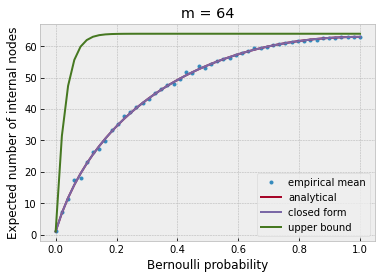

In [13]:
# fig = plt.figure(figsize=(12, 4))
# axes = fig.subplots(1, 2)
# ax = axes[0]
# ax.plot(rhos,np.mean(En_num,axis=1),'.',label='empirical mean')
# ax.plot(rhos,En,label='analytical')
# ax.legend()
# ax.set_ylabel('Expected number of nodes')
# ax.set_xlabel('Bernoulli probability')
# ax.set_title("m == 1")
# ax = axes[1]
plt.plot(rhos,np.mean(Es_num,axis=1),'.',label='empirical mean')
plt.plot(rhos,Es,label='analytical')
plt.plot(rhos, Ec, label="closed form")
plt.plot(rhos, UB, label="upper bound")
plt.legend()
plt.ylabel('Expected number of internal nodes')
plt.xlabel('Bernoulli probability')
plt.title(r"m = %d" % m)

Text(0, 0.5, '$p^{(j)}$')

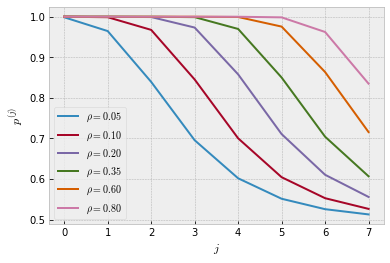

In [18]:
import numpy as np
import matplotlib.pyplot as plt

rhos = np.array([5, 10, 20, 35, 60, 80])/100
p1 = lambda m, ml, rho: (1-rho)**(ml/2) if ml == m else (1-rho)**(ml/2)/(1 + (1-rho)**(ml/2))
p = lambda m, ml, rho: 1 - p1(m, ml, rho)

m = 258
L = int(log(m)/log(2))
for rho in rhos:
    ps = [p(m, m/(2**l), rho) for l in range(L)]
    plt.plot(range(L), ps, label=r"$\rho = %.2f$" % rho)
plt.legend()
plt.xlabel(r"$j$")
plt.ylabel(r"$p^{(j)}$")